<h1>Kickstarter: Exploratory Data Analysis with Python</h1>

<i>Leonado Ferreira, 2018-02-12 </i> 
You can acess all my kernels  <a href=" https://www.kaggle.com/kabure/kernels">here</a>

<h2>The goal is try to understand : </h2>

- The difference values in  categorys.<br>
- The most frequency status of project<br>
- Distribuitions<br>
- Patterns <br>
- And some another informations that the data can show us<br>


<h1>Understanding Kickstarter: </h1>

<b>Kickstarter</b>
Is an American public-benefit corporation based in Brooklyn, New York, that maintains a global crowdfunding platform focused on creativity The company's stated mission is to "help bring creative projects to life". Kickstarter has reportedly received more than $1.9 billion in pledges from 9.4 million backers to fund 257,000 creative projects, such as films, music, stage shows, comics, journalism, video games, technology and food-related projects.

People who back Kickstarter projects are offered tangible rewards or experiences in exchange for their pledges. This model traces its roots to subscription model of arts patronage, where artists would go directly to their audiences to fund their work.


---

Dataset Overview

## Context
I'm a crowdfunding enthusiast and i'm watching kickstarter since its early days. Right now I just collect data and the only app i've made is this twitter bot which tweet any project reaching some milestone: @bloomwatcher . I have a lot of other ideas, but sadly not enough time to develop them... But I hope you can!

## Content
You'll find most useful data for project analysis. Columns are self explanatory except:

* usd_pledged: conversion in US dollars of the pledged column (conversion done by kickstarter).

* usd pledge real: conversion in US dollars of the pledged column (conversion from Fixer.io API).

* usd goal real: conversion in US dollars of the goal column (conversion from Fixer.io API).

## Acknowledgements
Data are collected from Kickstarter Platform

usd conversion (usd_pledged_real and usd_goal_real columns) were generated from convert ks pledges to usd script done by tonyplaysguitar

## Inspiration
I hope to see great projects, and why not a model to predict if a project will be successful before it is released? :)

In [1]:
#Load the Librarys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading the data with encode 
df_kick = pd.read_csv("../data visualization/ks-projects-201801.csv", nrows=10000)

In [3]:
#knowning the main informations of our data
print(df_kick.shape)
print(df_kick.info())

(10000, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
ID                  10000 non-null int64
name                10000 non-null object
category            10000 non-null object
main_category       10000 non-null object
currency            10000 non-null object
deadline            10000 non-null object
goal                10000 non-null float64
launched            10000 non-null object
pledged             10000 non-null float64
state               10000 non-null object
backers             10000 non-null int64
country             10000 non-null object
usd pledged         9898 non-null float64
usd_pledged_real    10000 non-null float64
usd_goal_real       10000 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 1.1+ MB
None


In [4]:
# Printing unique values in our dataset
print(df_kick.nunique())

ID                  10000
name                 9994
category              155
main_category          15
currency               14
deadline             2624
goal                  790
launched            10000
pledged              4607
state                   6
backers               716
country                23
usd pledged          5199
usd_pledged_real     5679
usd_goal_real        2863
dtype: int64


<h2> Knowing our data</h2>

In [5]:
#Looking the data
df_kick.head(n=5)
#sample@@

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd pledged  \
0  2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1  2017-09-02 04:43:57   2421.0    failed       15      US        100.0   
2  2013-01-12 00:20:50    220.0    failed        3      US        220.0   
3  2012-03-17 03:24:11      1.0    failed        1      US          1.0   
4  2015-07-04 08:35:03   1283.0  canceled       14      US       1283.0   

   usd_pledged_real  usd_goal_real  
0               0.0        1533.95  
1            2421.0       30000.00  
2             220.0       45000.00  
3               1.0        5000.00  
4            1283.0       19500.00

## Importing librarys to do some interactive graphics

In [52]:
import plotly.tools as tls
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import warnings
from collections import Counter

<h2>I will start, looking the state column distribuition that might will be our key to understand this dataset</h2>

In [53]:
percentual_sucess = round(df_kick["state"].value_counts() / len(df_kick["state"]) * 100,2)

print("State Percentual in %: ")
print(percentual_sucess)

state = round(df_kick["state"].value_counts() / len(df_kick["state"]) * 100,2)

labels = list(state.index)
values = list(state.values)

trace1 = go.Pie(labels=labels, values=values, marker=dict(colors=['red']))

layout = go.Layout(title='Distribuition of States', legend=dict(orientation="h"));

fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

State Percentual in %: 
failed        52.04
successful    35.65
canceled      10.06
undefined      0.96
live           0.83
suspended      0.46
Name: state, dtype: float64


Very interesting percentual ! <br>
just 35,38% of all projects got sucess.<br>
More than half have failed or 10% was canceled

---

<h1>Let's start looking our Project values</h1> <br>

- I will start exploring the distribuition logarithmn of these values
분포로그

In [8]:
df_failed = df_kick[df_kick["state"] == "failed"]
df_sucess = df_kick[df_kick["state"] == "successful"]

#First plot
trace0 = go.Histogram(
    x= np.log(df_kick.usd_goal_real + 1),
    histnorm='probability', showlegend=False,
    xbins=dict(
        start=-5.0,
        end=19.0,
        size=1),
    autobiny=True)

#Second plot
trace1 = go.Histogram(
    x = np.log(df_kick.usd_pledged_real + 1),
    histnorm='probability', showlegend=False,
    xbins=dict(
        start=-1.0,
        end=17.0,
        size=1))

# Add histogram data
x1 = np.log(df_failed['usd_goal_real']+1)
x2 = np.log(df_sucess["usd_goal_real"]+1)

trace3 = go.Histogram(
    x=x1,
    opacity=0.60, nbinsx=30, name='Goals Failed', histnorm='probability'
)
trace4 = go.Histogram(
    x=x2,
    opacity=0.60, nbinsx=30, name='Goals Sucessful', histnorm='probability'
)


data = [trace0, trace1, trace3, trace4]
layout = go.Layout(barmode='overlay')

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[ [{'colspan': 2}, None], [{}, {}]],
                          subplot_titles=('Failed and Sucessful Projects',
                                          'Goal','Pledged'))

#setting the figs
fig.append_trace(trace0, 2, 1)
fig.append_trace(trace1, 2, 2)
fig.append_trace(trace3, 1, 1)
fig.append_trace(trace4, 1, 1)

fig['layout'].update(title="Distribuitions",
                     height=500, width=900, barmode='overlay')
iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1           -      ]
[ (2,1) x2,y2 ]  [ (2,2) x3,y3 ]



Interesting difference between Pledged and Goal distribuition!  But we cannot see significantly differences beween failed and successful state

In [9]:
df_kick['pledged_log'] = np.log(df_kick['usd_pledged_real'] + 1)
df_kick['goal_log'] = np.log(df_kick['usd_goal_real'] + 1)

df_kick['diff_pledged_goal'] = round((df_kick['usd_pledged_real'] /df_kick['usd_goal_real']) * 100, 2)
df_kick['diff_pledged_goal'] = df_kick['diff_pledged_goal'].astype(float)

<h2>Description of the continous variables</h2>

In [10]:
print("Min Goal and Pledged values")
print(df_kick[["goal", "pledged"]].min())
print("")
print("Mean Goal and Pledged values")
print(round(df_kick[["goal", "pledged"]].mean(),2))
print("")
print("Median Goal and Pledged values")
print(df_kick[["goal", "pledged"]].median())
print("")
print("Max Goal and Pledged values")
print("goal       100000000.0") #If i put the both together give me back log values, 
print("pledged     20338986.27") # so i decide to just show this values
print("dtype: float64")
print("")
print("Std Goal and Pledged values")
print(round(df_kick[["goal", "pledged"]].std(),2))

Min Goal and Pledged values
goal       1.0
pledged    0.0
dtype: float64

Mean Goal and Pledged values
goal       39327.86
pledged    11267.14
dtype: float64

Median Goal and Pledged values
goal       5000.0
pledged     650.0
dtype: float64

Max Goal and Pledged values
goal       100000000.0
pledged     20338986.27
dtype: float64

Std Goal and Pledged values
goal       533344.76
pledged    130082.56
dtype: float64


<h2>Looking the State variable</h2>

- pledge log by state

- goal log by state

- goal log x pledged log

In [11]:
#First plot
trace0 = go.Box(
    x=df_kick['state'],
    y=df_kick['goal_log'],
    name="State x Goal Log"
)
#Second plot
trace1 = go.Box(
    x=df_kick['state'],
    y=df_kick['pledged_log'],
    name="State x Pledged Log"
)
#Third plot
trace2 = go.Scatter(
    x=df_kick['goal_log'], y=df_kick['pledged_log'],
    name="Goal x Pledged Distribuition",  showlegend=False,
    mode = 'markers'
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Goal','Pledged', "Goal x Pledged (Both Log)"))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title="Some State Distribuitions",
                     xaxis=dict(
                         title='State', ticklen=5, zeroline=False, gridwidth=2
                     ),
                     yaxis=dict(
                         title='Goal(Log)', ticklen=5, gridwidth=2
                     ),
                     xaxis1=dict(title='State', ticklen=5, zeroline=False, gridwidth=2),
                     yaxis1=dict(title='Pledged(Log)', ticklen=5, gridwidth=2),
                     xaxis2=dict(title='Goal(Log)', ticklen=5, zeroline=False, gridwidth=2),
                     yaxis2=dict(title='Pledged(Log)', ticklen=5, gridwidth=2))
iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3           -      ]



<h2>Analysing further the Categorys: </h2>

- Sucessful category's frequency

- failed category's frequency

- General Goal Distribuition by Category

In [12]:
main_cats = df_kick["main_category"].value_counts()
main_cats_failed = df_kick[df_kick["state"] == "failed"]["main_category"].value_counts()
main_cats_sucess = df_kick[df_kick["state"] == "successful"]["main_category"].value_counts()

In [13]:
#First plot
trace0 = go.Bar(
    x=main_cats_failed.index,
    y=main_cats_failed.values,
    name="Failed Category's"
)
#Second plot
trace1 = go.Bar(
    x=main_cats_sucess.index,
    y=main_cats_sucess.values,
    name="Sucess Category's"
)
#Third plot
trace2 = go.Bar(
    x=main_cats.index,
    y=main_cats.values,
    name="All Category's Distribuition"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Failed','Sucessful', "General Category's"))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title="Main Category's Distribuition",bargap=0.05)
iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3           -      ]



<h2>Looking the Goal and Pledged Means by State</h2>

In [14]:
print("Looking Goal and Pledged Mean by state ")
print(round(df_kick.groupby(["state"])["goal", "usd_pledged_real"].mean(),2))

Looking Goal and Pledged Mean by state 
                goal  usd_pledged_real
state                                 
canceled    80395.42           2322.93
failed      51788.43           1391.63
live        27271.07           5933.51
successful  10163.84          26528.02
suspended   86465.17           5684.11
undefined    4362.85           1894.72


We have a high mean and standard deviation... Interesting values. <br>
Let's known better the distribuition of this values using log scale

---

<h2>We have a very interesting distribuition in goal values.</h2>

In [15]:
categorys_failed = df_kick[df_kick["state"] == "failed"]["category"].value_counts()[:25]
categorys_sucessful = df_kick[df_kick["state"] == "successful"]["category"].value_counts()[:25]
categorys_general = df_kick["category"].value_counts()[:25]

#First plot
trace0 = go.Histogram(
    x=df_kick[(df_kick.category.isin(categorys_failed.index.values)) & 
              (df_kick["state"] == "failed")]['category'].head(100000),
    histnorm='percent', name="Top 15 Failed", showlegend=False
)
#Second plot
trace1 = go.Histogram(
    x=df_kick[(df_kick.category.isin(categorys_sucessful.index.values)) & 
              (df_kick["state"] == "successful")]['category'].head(100000),
    histnorm='percent', name="Top 15 Sucessful", showlegend=False
)

#Third plot
trace2 = go.Histogram(
    x=df_kick[(df_kick.category.isin(categorys_general.index.values))]['category'].head(100000),
    histnorm='percent', name="Top 25 All Category's", showlegend=False
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Top 15 Failed','Top 15 Sucessful', "Top 25 All Category's"))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title="Top Frequency Category's")
iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3           -      ]



## I will take a further look at top 10 sucessful and failed categorys.
I will look at:
- Goal
- Pledged
- diff_pleded_goal 

In [16]:
#First plot
trace0 = go.Box(
    x=df_kick[(df_kick.category.isin(categorys_failed.index.values)) & 
              (df_kick["state"] == "failed")]['category'],
    y=df_kick[(df_kick.category.isin(categorys_failed.index.values)) & 
              (df_kick["state"] == "failed")]['pledged_log'].head(100000),
    name="Failed Category's", showlegend=False
)

#Second plot
trace1 = go.Box(
    x=df_kick[(df_kick.category.isin(categorys_sucessful.index.values)) & 
              (df_kick["state"] == "successful")]['category'],
    y=df_kick[(df_kick.category.isin(categorys_sucessful.index.values)) & 
              (df_kick["state"] == "successful")]['pledged_log'].head(100000),
    name="Sucessful Category's", showlegend=False
)

#Third plot
trace2 = go.Box(
    x=df_kick[(df_kick.category.isin(categorys_general.index.values))]['category'],
    y=df_kick[(df_kick.category.isin(categorys_general.index.values))]['pledged_log'].head(100000),
    name="All Category's Distribuition", showlegend=False
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Failed','Sucessful', "General Category's", ))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title="Main Category's Distribuition")
iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3           -      ]



We can see that almost all categorys in sucessful have the same distribuition of values but some video games projects have the highest values in % difference of Pledged by Goal 

---
## Now I will take a look at top 10 failed categorys

In [17]:
cat_fill = df_kick[df_kick.category.isin(categorys_failed[:10].index.values)]

#First plot
trace0 = go.Box(
    x=cat_fill['category'],
    y=cat_fill['goal_log'].head(100000),
    name="Failed Category's", showlegend=False
)

#Second plot
trace1 = go.Box(
    x=cat_fill['category'],
    y=cat_fill['pledged_log'].head(100000),
    name="Sucessful Category's", showlegend=False
)

#Third plot
trace2 = go.Box(
    x=cat_fill['category'],
    y=np.log(cat_fill['diff_pledged_goal'] + 1).head(100000),
    name="Pledged", showlegend=False
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Goal Log','Pledged Log', "Diff of Pledged and Goal", ))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, 
                     title="Distribuition of Values by Top 10 Categorys")
iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3           -      ]



<h2>Now I will start to Investigating the 3 top sucess and fail projects</h2>

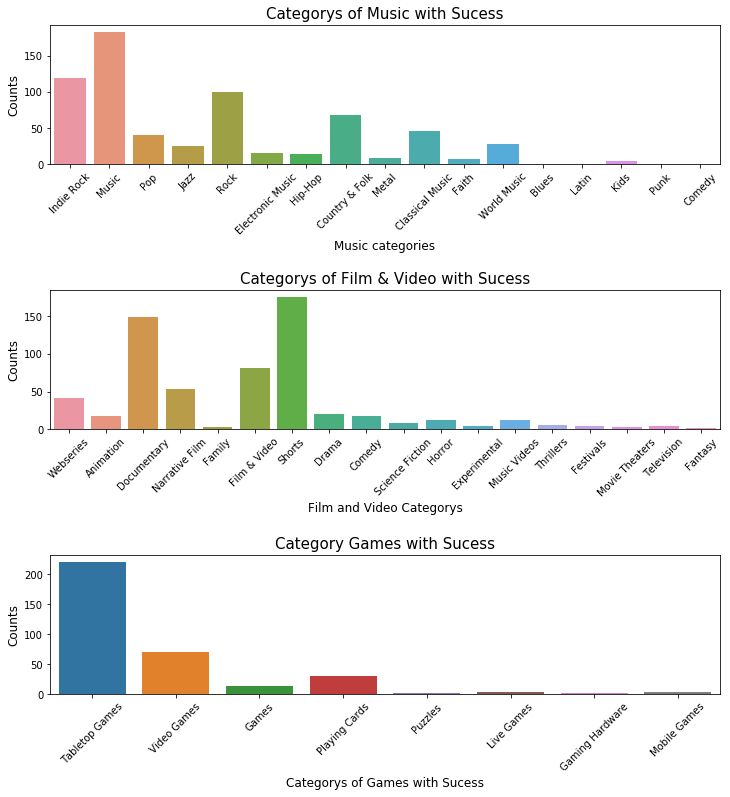

In [18]:
sucess_music = df_kick[(df_kick['main_category'] == 'Music') & 
                      (df_kick['state'] == 'successful')]
sucess_filme_video = df_kick[(df_kick['main_category'] == 'Film & Video') & 
                      (df_kick['state'] == 'successful')]
sucess_games = df_kick[(df_kick['main_category'] == 'Games') & 
                      (df_kick['state'] == 'successful')]

plt.figure(figsize=(12,12))

plt.subplot(3,1,1)
ax0 = sns.countplot(x='category', data=sucess_music)
ax0.set_xticklabels(ax0.get_xticklabels(),rotation=45)
ax0.set_title("Categorys of Music with Sucess", fontsize=15)
ax0.set_xlabel("Music categories", fontsize=12)
ax0.set_ylabel("Counts", fontsize=12)

plt.subplot(3,1,2)
ax1 = sns.countplot(x='category', data=sucess_filme_video)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
ax1.set_title("Categorys of Film & Video with Sucess", fontsize=15)
ax1.set_xlabel("Film and Video Categorys", fontsize=12)
ax1.set_ylabel("Counts", fontsize=12)

plt.subplot(3,1,3)
ax2 = sns.countplot(x='category', data=sucess_games)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45)
ax2.set_title("Category Games with Sucess", fontsize=15)
ax2.set_xlabel("Categorys of Games with Sucess", fontsize=12)
ax2.set_ylabel("Counts", fontsize=12)

plt.subplots_adjust(wspace = 0.3, hspace = 0.9,top = 0.9)

plt.show()

<h2>Main Category</h2>

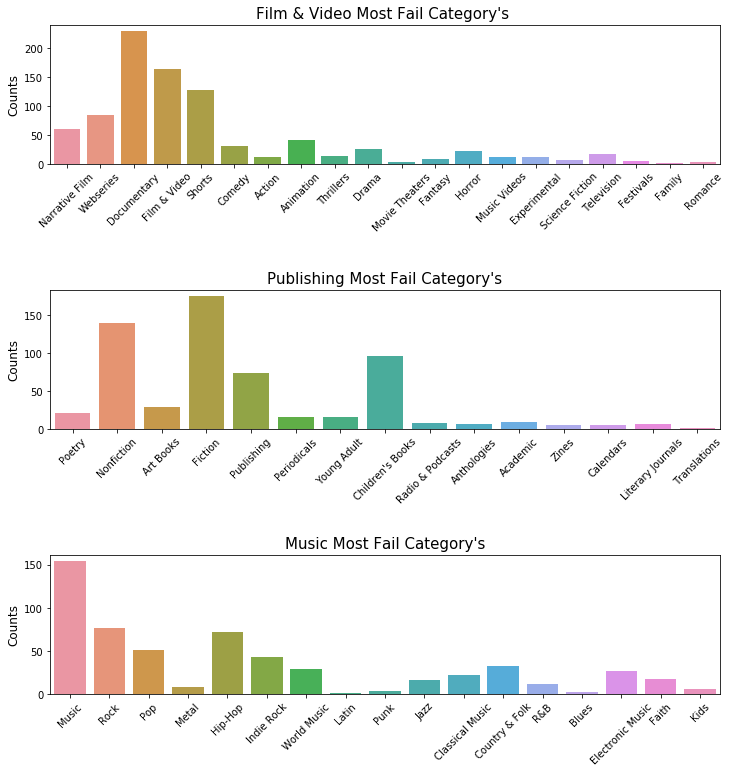

In [19]:
failed_film = df_kick[(df_kick['main_category'] == 'Film & Video') & 
                      (df_kick['state'] == 'failed')]
failed_publishing = df_kick[(df_kick['main_category'] == 'Publishing') & 
                      (df_kick['state'] == 'failed')]
failed_music = df_kick[(df_kick['main_category'] == 'Music') & 
                      (df_kick['state'] == 'failed')]

plt.figure(figsize=(12,12))

plt.subplot(3,1,1)
ax0 = sns.countplot(x='category', data=failed_film)
ax0.set_xticklabels(ax0.get_xticklabels(),rotation=45)
ax0.set_title("Film & Video Most Fail Category's ", fontsize=15)
ax0.set_xlabel("", fontsize=12)
ax0.set_ylabel("Counts", fontsize=12)

plt.subplot(3,1,2)
ax1 = sns.countplot(x='category', data=failed_publishing)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
ax1.set_title("Publishing Most Fail Category's", fontsize=15)
ax1.set_xlabel("", fontsize=12)
ax1.set_ylabel("Counts", fontsize=12)

plt.subplot(3,1,3)
ax2 = sns.countplot(x='category', data=failed_music)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45)
ax2.set_title("Music Most Fail Category's", fontsize=15)
ax2.set_xlabel("", fontsize=12)
ax2.set_ylabel("Counts", fontsize=12)

plt.subplots_adjust(wspace = 0.5, hspace = 0.9,top = 0.9)
plt.show()

In the musics with sucess the most frequent is Indie, and fails is Rock and Hip Hop! 

Another interesting thing, is that Documentary is a significant value in both states... 

---

<h1> Looking the time and another features  </h1>


In [20]:
df_kick['launched'] = pd.to_datetime(df_kick['launched'])
df_kick['laun_month_year'] = df_kick['launched'].dt.to_period("M")
df_kick['laun_year'] = df_kick['launched'].dt.to_period("A")
df_kick['laun_hour'] = df_kick['launched'].dt.hour

df_kick['deadline'] = pd.to_datetime(df_kick['deadline'])
df_kick['dead_month_year'] = df_kick['deadline'].dt.to_period("M")
df_kick['dead_year'] = df_kick['launched'].dt.to_period("A")

In [21]:
#Creating a new columns with Campaign total months
df_kick['time_campaign'] = df_kick['dead_month_year'] - df_kick['laun_month_year']
df_kick['time_campaign'] = df_kick['time_campaign'].astype(int)


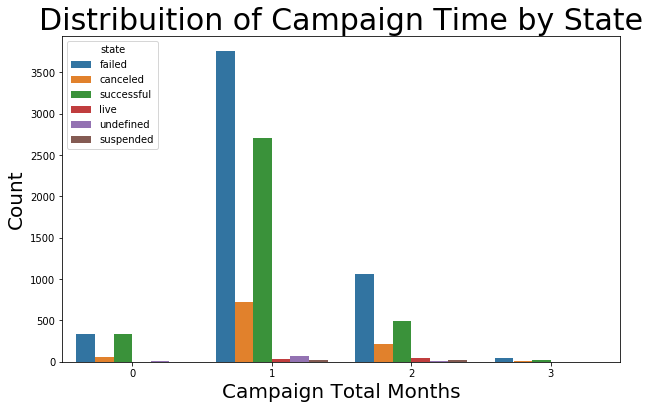

Descriptions of Campaign Time x State
state          canceled  failed  live  successful  suspended  undefined
time_campaign                                                          
0                    61     335     1         341          2          7
1                   725    3757    39        2708         27         76
2                   211    1060    43         490         17         13
3                     8      52     0          26          0          0


In [22]:
plt.figure(figsize = (10,6))

ax = sns.countplot(x='time_campaign', hue='state', 
                   data=df_kick[df_kick['time_campaign'] < 10])
ax.set_title("Distribuition of Campaign Time by State", fontsize=30)
ax.set_xlabel("Campaign Total Months", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
plt.show()

print("Descriptions of Campaign Time x State")
print(pd.crosstab(df_kick[df_kick['time_campaign'] < 5]['time_campaign'], df_kick.state))



In [23]:
df_kick.laun_month_year = df_kick.laun_month_year.dt.strftime('%Y-%m')
df_kick.laun_year = df_kick.laun_year.dt.strftime('%Y')

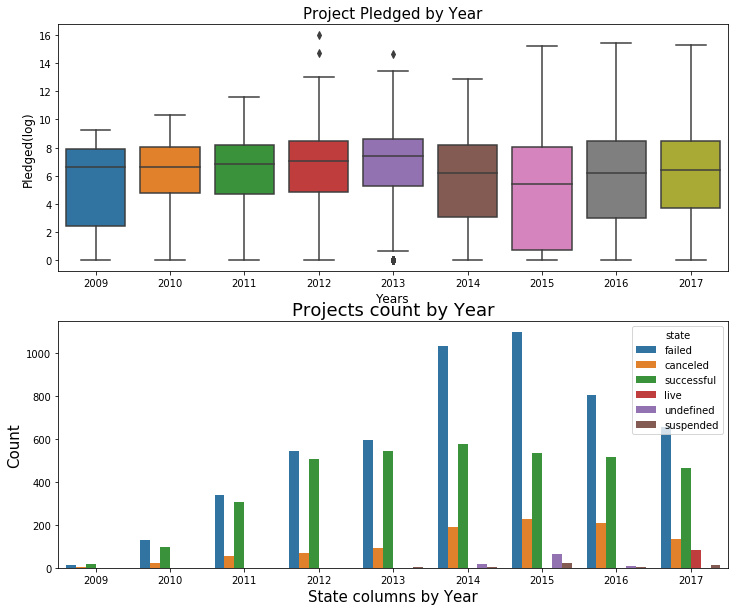

Descriptive status count by year
state      canceled  failed  live  successful  suspended  undefined
laun_year                                                          
1970              1       0     0           0          0          0
2009              5      15     0          17          0          0
2010             21     128     0          95          1          0
2011             55     338     0         305          1          0
2012             70     542     0         508          0          0
2013             90     593     0         546          2          0
2014            192    1033     0         578          3         20
2015            227    1096     0         536         22         66
2016            209     805     0         517          6         10
2017            136     654    81         463         11          0
2018              0       0     2           0          0          0


In [24]:
year = df_kick['laun_year'].value_counts()
month = df_kick['laun_month_year'].value_counts()

fig, ax = plt.subplots(2,1, figsize=(12,10))

plt.subplot(211)
ax1 = sns.boxplot(x="laun_year", y='pledged_log', 
                  data=df_kick[(df_kick.laun_year > '2008') & (df_kick.laun_year < '2018')])
ax1.set_title("Project Pledged by Year", fontsize=15)
ax1.set_xlabel("Years", fontsize=12)
ax1.set_ylabel("Pledged(log)", fontsize=12)

plt.subplot(212)
ax2 = sns.countplot(x="laun_year", hue='state', 
                    data=df_kick[(df_kick.laun_year > '2008') & (df_kick.laun_year < '2018')])
ax2.set_title("Projects count by Year", fontsize=18)
ax2.set_xlabel("State columns by Year", fontsize=15)
ax2.set_ylabel("Count", fontsize=15)

#order=['1970','2009','2010','2011','2012',
#'2013','2014','2015', '2016', '2017','2018']
# Why the order are not working? 
plt.show()

print("Descriptive status count by year")
print(pd.crosstab(df_kick.laun_year, df_kick.state))

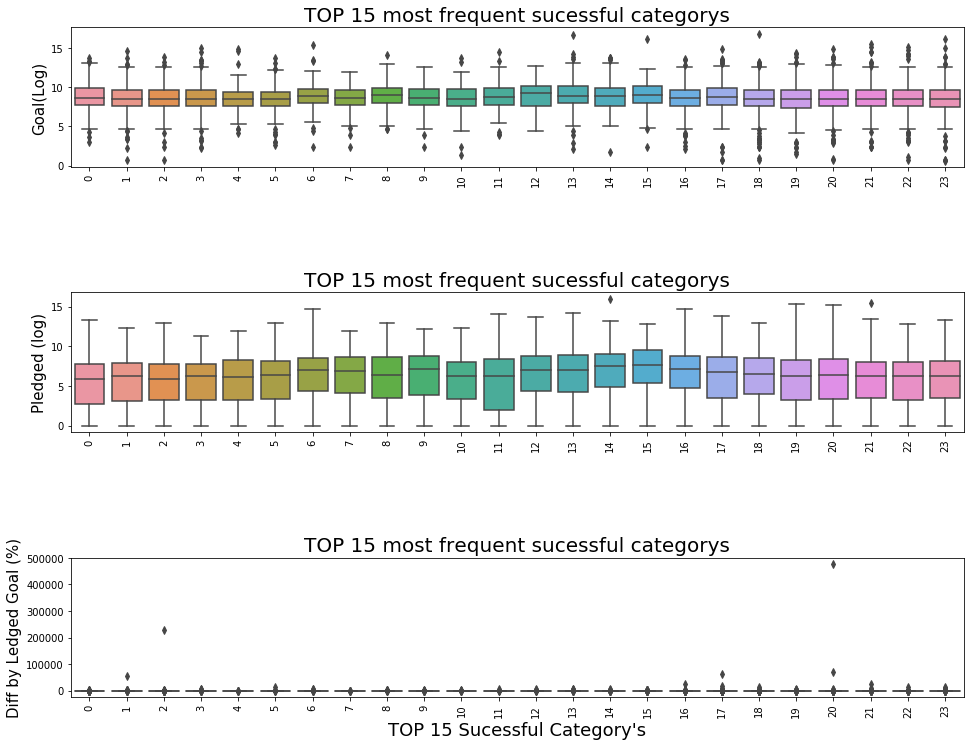

In [25]:
hour = df_kick['laun_hour'].value_counts()

plt.figure(figsize=(16,12))

g1 = plt.subplot(311)
g1 = sns.boxplot(x='laun_hour', y='goal_log', 
                 data=df_kick)
g1.set_title("TOP 15 most frequent sucessful categorys", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_ylabel("Goal(Log)", fontsize=15)

g2 = plt.subplot(312)
g2 = sns.boxplot(x= 'laun_hour', y='pledged_log', 
                 data=df_kick)
g2.set_title("TOP 15 most frequent sucessful categorys", fontsize=20)
g2.set_xlabel("", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=90)
g2.set_ylabel("Pledged (log)", fontsize=15)

ax2 = plt.subplot(313)
ax2 = sns.boxplot(x= 'laun_hour', y='diff_pledged_goal', 
                 data=df_kick)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax2.set_title("TOP 15 most frequent sucessful categorys", fontsize=20)
ax2.set_xlabel("TOP 15 Sucessful Category's", fontsize=18)
ax2.set_ylabel("Diff by Ledged Goal (%)", fontsize=15)

plt.subplots_adjust(wspace = 0.5, hspace = 0.9,top = 0.9)

plt.show()

## Taking a look athe the distribuition of Diff Pledged sucessful and failed Projects

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



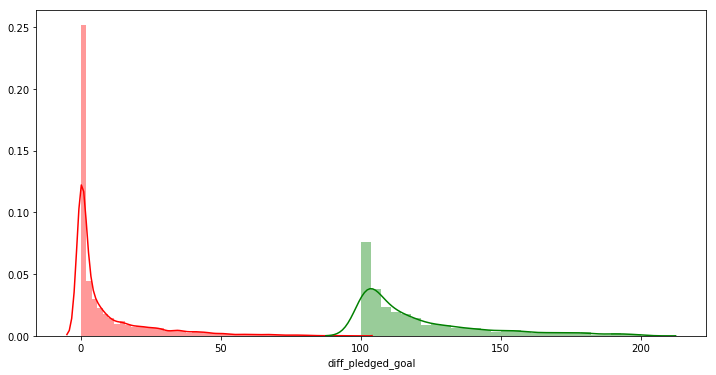

In [26]:
plt.figure(figsize = (12,6))
sns.distplot(df_kick[(df_kick['diff_pledged_goal'] < 200) & 
                     (df_kick['state'] == 'failed')]['diff_pledged_goal'], color='r')
sns.distplot(df_kick[(df_kick['diff_pledged_goal'] < 200) & 
                     (df_kick['state'] == 'successful')]['diff_pledged_goal'],color='g')
plt.show()

diff pledged?

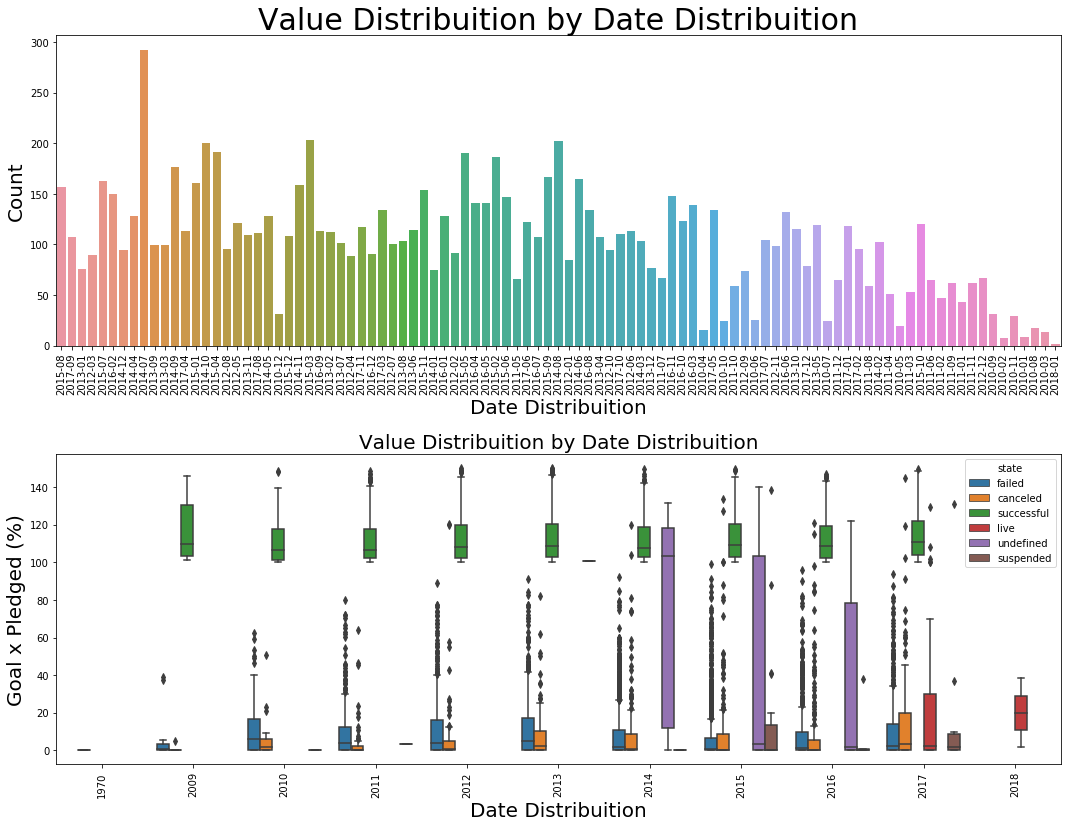

In [27]:
plt.figure(figsize = (18,15))

plt.subplots_adjust(hspace = 0.35, top = 0.8)

g1 = plt.subplot(211)
g1 = sns.countplot(x="laun_month_year", data=df_kick[df_kick['laun_month_year'] >= '2010-01'])
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_title("Value Distribuition by Date Distribuition", fontsize=30)
g1.set_xlabel("Date Distribuition", fontsize=20)
g1.set_ylabel("Count", fontsize=20)

g2 = plt.subplot(212)
g2 = sns.boxplot(x="laun_year", y="diff_pledged_goal",
                 data=df_kick[df_kick['diff_pledged_goal'] < 150], 
                 hue="state")
g2.set_xticklabels(g2.get_xticklabels(),rotation=90)
g2.set_title("Value Distribuition by Date Distribuition", fontsize=20)
g2.set_xlabel("Date Distribuition", fontsize=20)
g2.set_ylabel("Goal x Pledged (%)", fontsize=20)
plt.show()

Looking the difference pledged x goal between failed and sucessful 

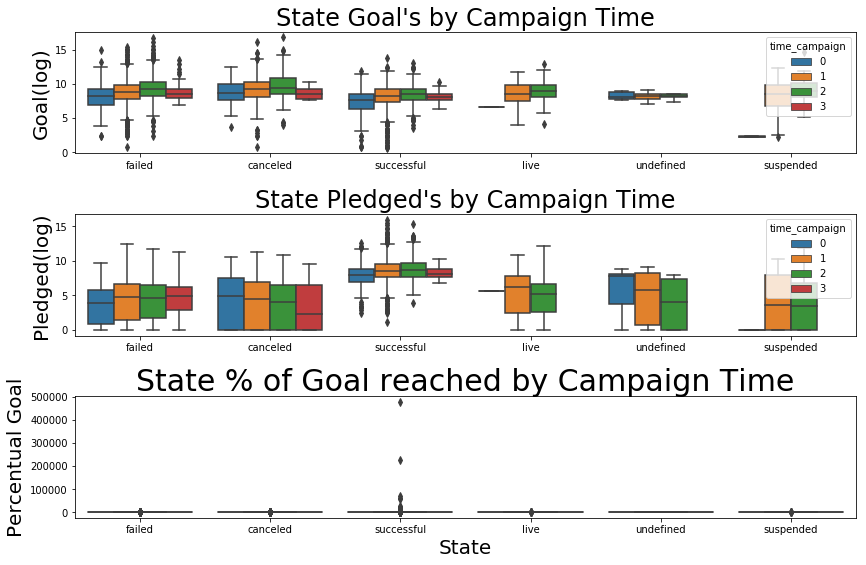

In [28]:
plt.figure(figsize = (14,10))

plt.subplots_adjust(hspace = 0.50, top = 0.8)

plt.subplot(311)
g =sns.boxplot(x='state', y='goal_log', 
            data=df_kick[df_kick['time_campaign'] < 10], 
            hue='time_campaign')
g.set_title("State Goal's by Campaign Time", fontsize=24)
g.set_xlabel("", fontsize=20)
g.set_ylabel("Goal(log)", fontsize=20)

plt.subplot(312, sharex=g)
g1 = sns.boxplot(x='state', y='pledged_log', 
            data=df_kick[df_kick['time_campaign'] < 10], 
            hue='time_campaign')
g1.set_title("State Pledged's by Campaign Time", fontsize=24)
g1.set_xlabel("", fontsize=20)
g1.set_ylabel("Pledged(log)", fontsize=20)

plt.subplot(313)
g2 = sns.boxplot(x='state', y='diff_pledged_goal', 
            data=df_kick)
g2.set_title("State % of Goal reached by Campaign Time", fontsize=30)
g2.set_xlabel("State", fontsize=20)
g2.set_ylabel("Percentual Goal", fontsize=20)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



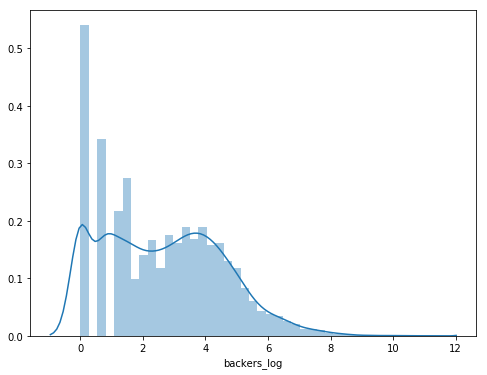

In [29]:
df_kick['backers_log'] = np.log(df_kick['backers'] + 1 ) 
#The + 1 is to normalize the zero or negative values

plt.figure(figsize = (8,6))
sns.distplot(df_kick['backers_log'])

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



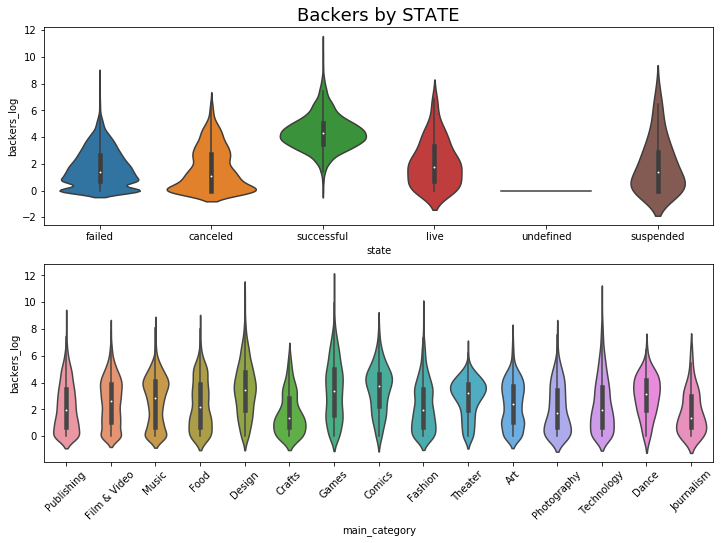

In [30]:
plt.figure(figsize = (12,8))

plt.subplot(211)
g = sns.violinplot(x='state',y='backers_log', 
               data=df_kick)
g.set_title("Backers by STATE", fontsize=18)

plt.subplot(212)
g = sns.violinplot(x='main_category',y='backers_log', 
                   data=df_kick)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.show()

## backers_log

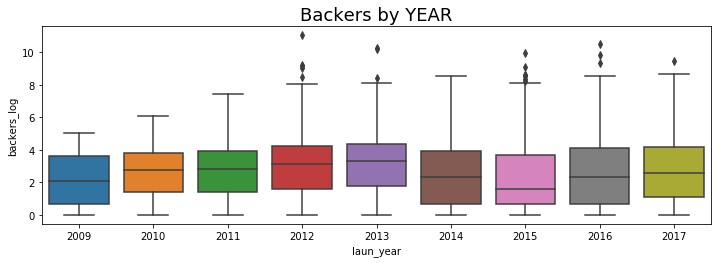

In [31]:
plt.figure(figsize = (12,8))

plt.subplot(211)
g = sns.boxplot(x='laun_year',y='backers_log', 
               data=df_kick[(df_kick.laun_year > '2008') & (df_kick.laun_year < '2018')])
g.set_title("Backers by YEAR", fontsize=18)

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



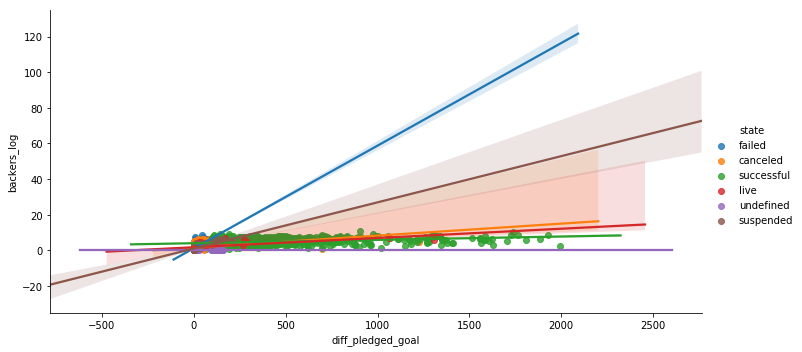

In [32]:
#Looking the relation of Backers and % of goal reached
sns.lmplot(x='diff_pledged_goal', y ='backers_log', 
           data=df_kick[df_kick['diff_pledged_goal'] < 2000], size = 5, aspect = 2,
           hue='state')
plt.show()

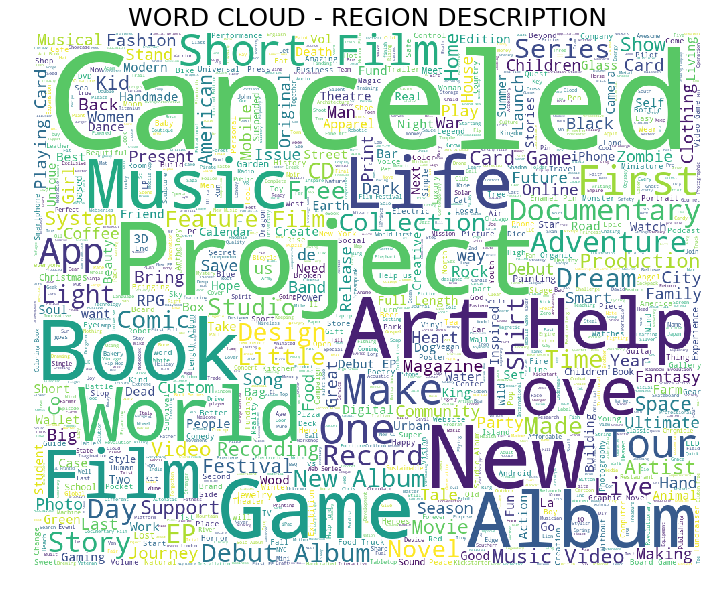

In [55]:
from wordcloud import WordCloud, STOPWORDS
import nltk.tokenize as word_tokenize
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re
from nltk.stem.porter import *
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction import stop_words

from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=1500,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(df_kick['name'].dropna().astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - REGION DESCRIPTION",fontsize=25)
plt.axis('off')
plt.show()

Someone can help me to fix this error in wordcloud? 된건가?

---

<h1>Conclusions: </h1>

<i>I will continue</i>

Below I did some tests
    

In [56]:
df_kick[df_kick['diff_pledged_goal'] > 1000].shape

KeyError: 'diff_pledged_goal'